In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
house = fetch_california_housing()
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
house.data.shape, house.target.shape

((20640, 8), (20640,))

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    house.data, house.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

(11610, 8) (11610,)
(5160, 8) (5160,)
(3870, 8) (3870,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [6]:
# 手动实现学习率的超参数搜索
learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rate:
    model = keras.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(x_train_scaled, y_train,
                        validation_data=(x_valid_scaled, y_valid),
                        epochs=100,
                        callbacks=[keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)])
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 158us/sample - loss: 6.9721 - val_loss: 6.0659
Epoch 2/100
11610/11610 [==============================] - 1s 79us/sample - loss: 5.0351 - val_loss: 4.5543
Epoch 3/100
11610/11610 [==============================] - 1s 79us/sample - loss: 3.8702 - val_loss: 3.6044
Epoch 4/100
11610/11610 [==============================] - 1s 84us/sample - loss: 3.1232 - val_loss: 2.9732
Epoch 5/100
11610/11610 [==============================] - 1s 78us/sample - loss: 2.6150 - val_loss: 2.5290
Epoch 6/100
11610/11610 [==============================] - 1s 102us/sample - loss: 2.2503 - val_loss: 2.1991
Epoch 7/100
11610/11610 [==============================] - 1s 81us/sample - loss: 1.9764 - val_loss: 1.9452
Epoch 8/100
11610/11610 [==============================] - 1s 80us/sample - loss: 1.7620 - val_loss: 1.7425
Epoch 9/100
11610/11610 [==============================] - 1s 80us/sample - loss: 1.5

11610/11610 [==============================] - 1s 92us/sample - loss: 1.9415 - val_loss: 1.6067
Epoch 3/100
11610/11610 [==============================] - 1s 78us/sample - loss: 1.2619 - val_loss: 1.1714
Epoch 4/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.9621 - val_loss: 0.9620
Epoch 5/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.8219 - val_loss: 0.8592
Epoch 6/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.7512 - val_loss: 0.8029
Epoch 7/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.7125 - val_loss: 0.7688
Epoch 8/100
11610/11610 [==============================] - 1s 95us/sample - loss: 0.6885 - val_loss: 0.7447
Epoch 9/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.6715 - val_loss: 0.7262
Epoch 10/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.6577 - val_loss: 0.7113
Epoch 11/100
11610/11610 [=============

Epoch 27/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4452 - val_loss: 0.4724
Epoch 28/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4428 - val_loss: 0.4727
Epoch 29/100
11610/11610 [==============================] - 1s 111us/sample - loss: 0.4409 - val_loss: 0.4672
Epoch 30/100
11610/11610 [==============================] - 1s 82us/sample - loss: 0.4387 - val_loss: 0.4658
Epoch 31/100
11610/11610 [==============================] - 1s 117us/sample - loss: 0.4368 - val_loss: 0.4610
Epoch 32/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4348 - val_loss: 0.4616
Epoch 33/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.4329 - val_loss: 0.4574
Epoch 34/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4310 - val_loss: 0.4551
Epoch 35/100
11610/11610 [==============================] - 1s 90us/sample - loss: 0.4289 - val_loss: 0.4516
Epoch 36/100
1161

11610/11610 [==============================] - 1s 96us/sample - loss: 0.3411 - val_loss: 0.6607
Epoch 24/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.3386 - val_loss: 0.6547
Epoch 25/100
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3492 - val_loss: 0.6521
Epoch 26/100
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3385 - val_loss: 0.6492
Epoch 27/100
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3366 - val_loss: 0.6557
Epoch 28/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3354 - val_loss: 0.6510
Epoch 29/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.3349 - val_loss: 0.6656
Epoch 30/100
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3379 - val_loss: 0.6449
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 116us/sample - loss: 1.5102 - 

Learning rate:  0.0001


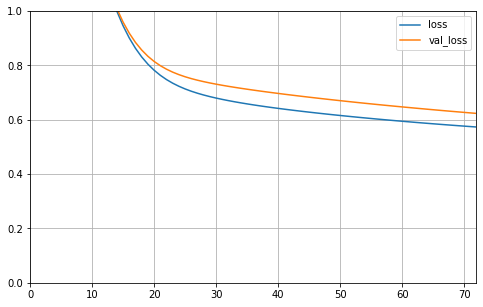

Learning rate:  0.0003


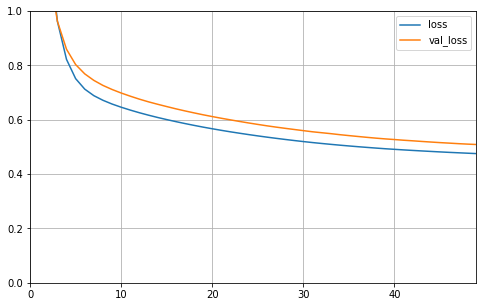

Learning rate:  0.001


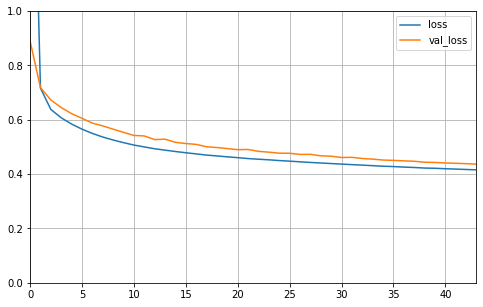

Learning rate:  0.003


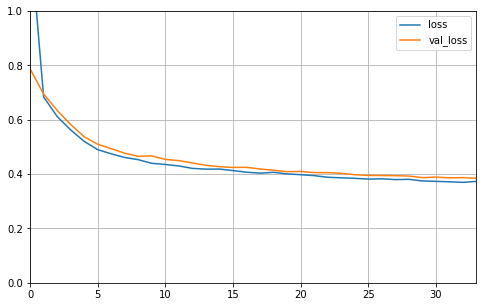

Learning rate:  0.01


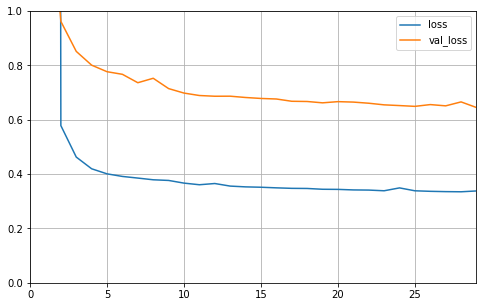

Learning rate:  0.03


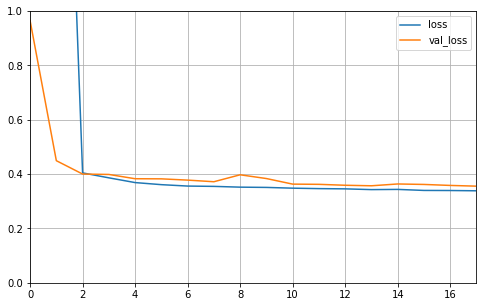

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
for lr, history in zip(learning_rate, histories):
    print('Learning rate: ', lr)
    plot_learning_curves(history)